In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Load data
df = pd.read_csv('NVIDIA Stock Price.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)

In [22]:
# Inspect
print(df.head())

             Price    Open    High     Low     Vol. Change %
Date                                                        
2025-06-18  145.48  144.01  145.65  143.12  161.49M    0.94%
2025-06-17  144.12  144.49  145.22  143.78  139.11M   -0.39%
2025-06-16  144.69  143.35  146.18  143.20  183.13M    1.92%
2025-06-13  141.97  142.48  143.58  140.85  180.82M   -2.09%
2025-06-12  145.00  141.97  145.00  141.85  162.36M    1.52%


In [24]:
# Calculate daily return
df['Daily Return'] = df['Price'].pct_change()

In [26]:
# Calculate moving averages
df['MA7'] = df['Price'].rolling(window=7).mean()
df['MA30'] = df['Price'].rolling(window=30).mean()

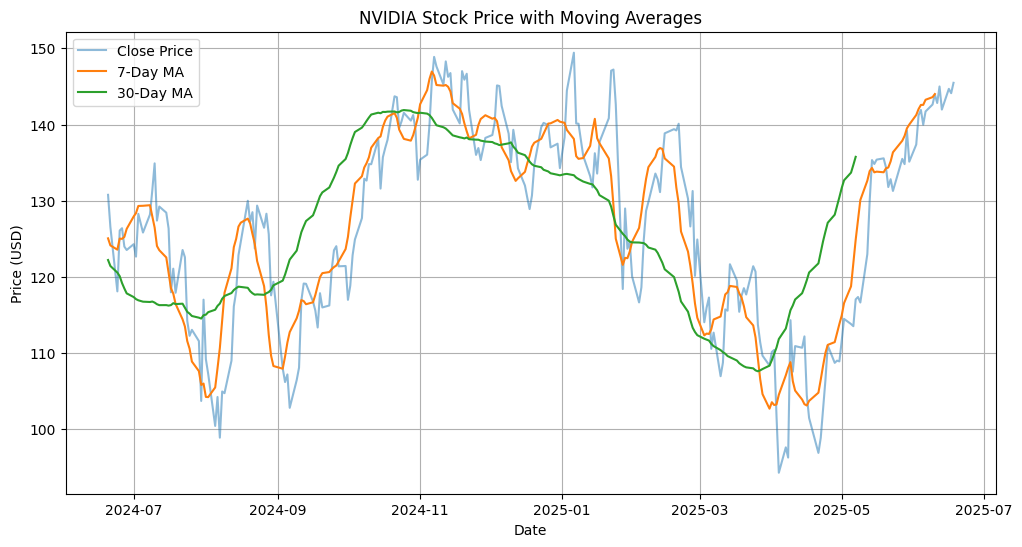

In [28]:
# Plot closing price and moving averages
plt.figure(figsize=(12,6))
plt.plot(df['Price'], label='Close Price', alpha=0.5)
plt.plot(df['MA7'], label='7-Day MA')
plt.plot(df['MA30'], label='30-Day MA')
plt.title('NVIDIA Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# Add a 90-day moving average
df['MA90'] = df['Price'].rolling(window=90).mean()

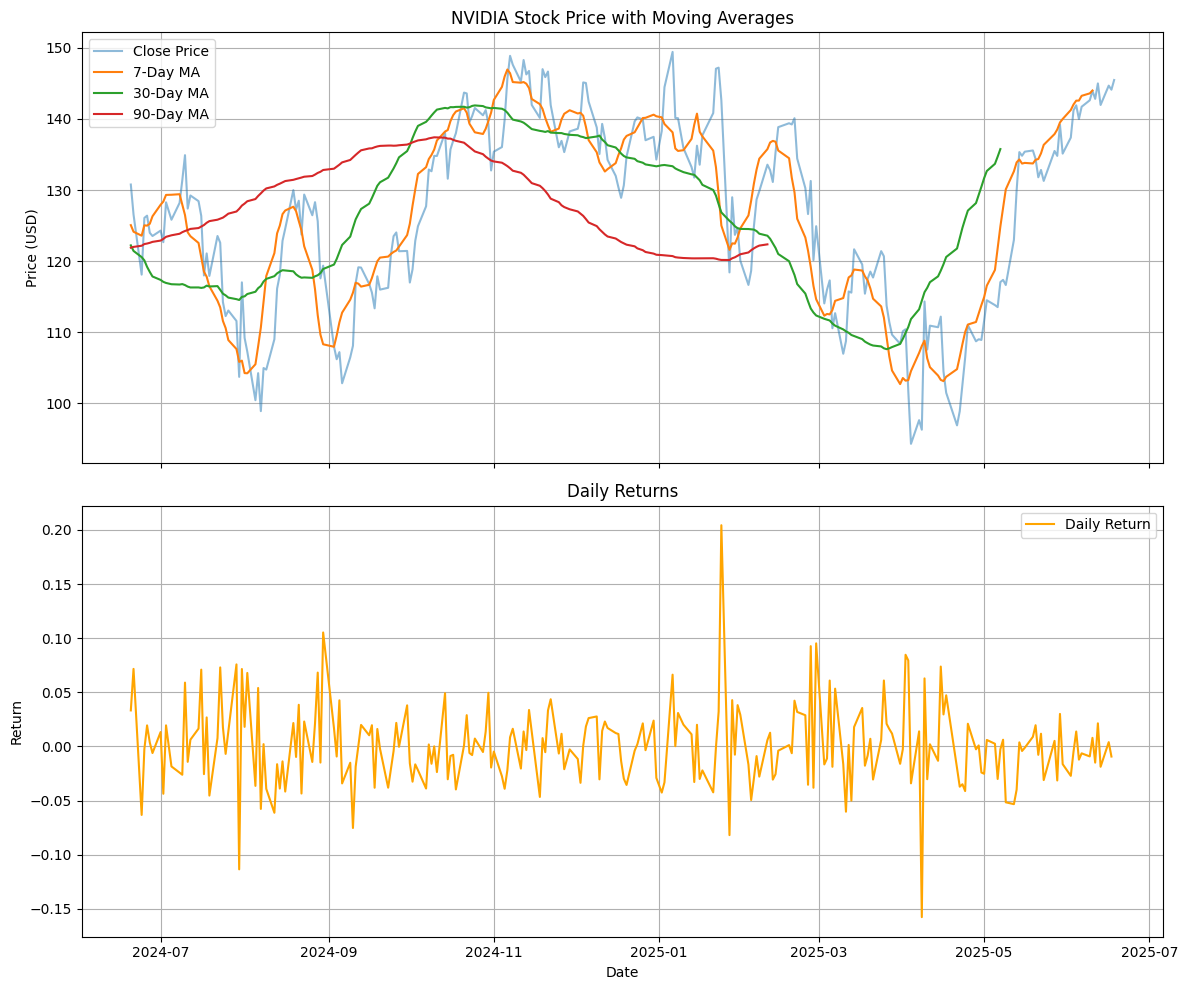

In [36]:
# Plot with moving averages and daily returns as subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,10), sharex=True)

# Price and moving averages
ax1.plot(df['Price'], label='Close Price', alpha=0.5)
ax1.plot(df['MA7'], label='7-Day MA')
ax1.plot(df['MA30'], label='30-Day MA')
ax1.plot(df['MA90'], label='90-Day MA')
ax1.set_title('NVIDIA Stock Price with Moving Averages')
ax1.set_ylabel('Price (USD)')
ax1.legend()
ax1.grid(True)

# Daily returns
ax2.plot(df['Daily Return'], label='Daily Return', color='orange')
ax2.set_title('Daily Returns')
ax2.set_xlabel('Date')
ax2.set_ylabel('Return')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

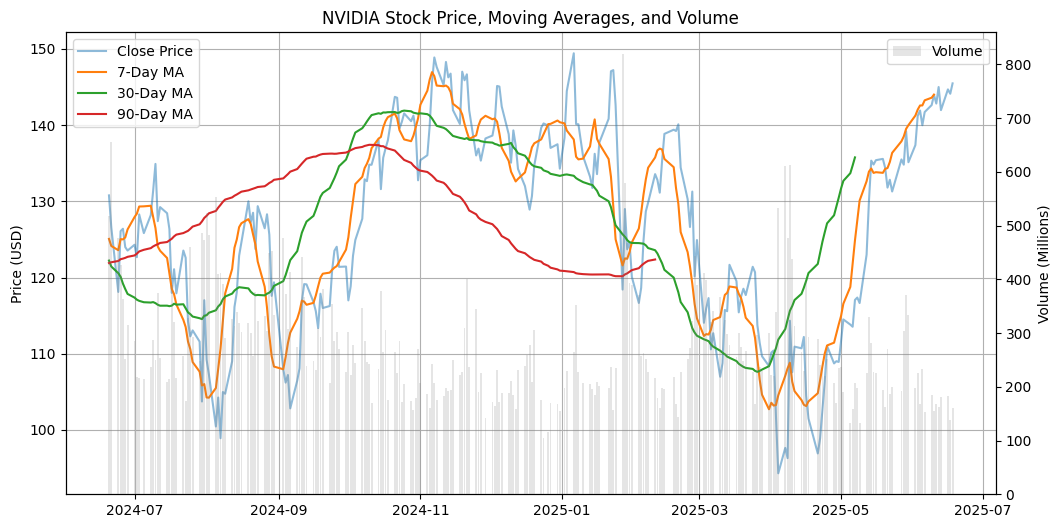

In [38]:
# Plot price, moving averages, and volume
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(df['Price'], label='Close Price', alpha=0.5)
ax1.plot(df['MA7'], label='7-Day MA')
ax1.plot(df['MA30'], label='30-Day MA')
ax1.plot(df['MA90'], label='90-Day MA')
ax1.set_ylabel('Price (USD)')
ax1.legend(loc='upper left')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.bar(df.index, df['Vol.'].str.replace('M','').astype(float), color='gray', alpha=0.2, label='Volume')
ax2.set_ylabel('Volume (Millions)')
ax2.legend(loc='upper right')

plt.title('NVIDIA Stock Price, Moving Averages, and Volume')
plt.show()

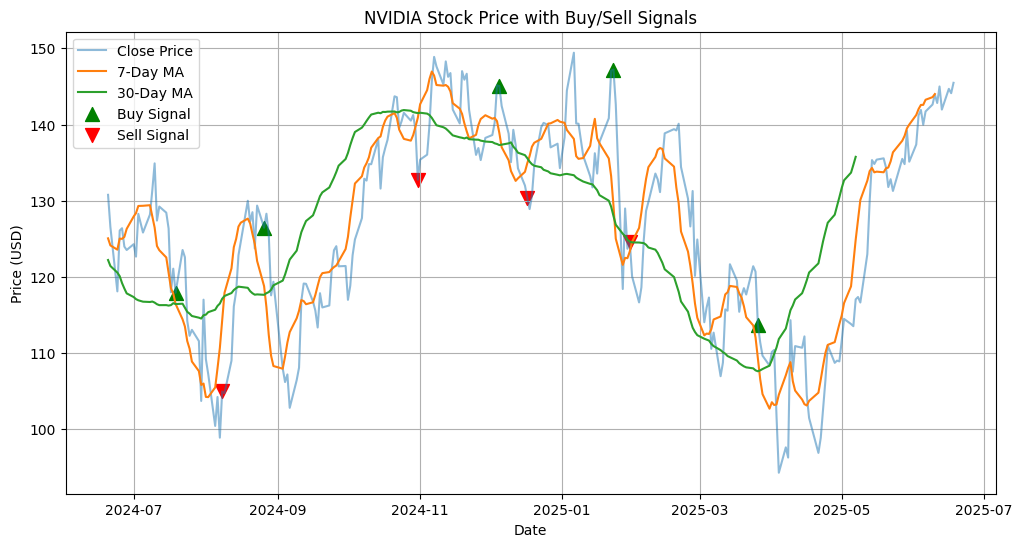

In [41]:
# Find crossover points
buy_signals = (df['MA7'] > df['MA30']) & (df['MA7'].shift(1) <= df['MA30'].shift(1))
sell_signals = (df['MA7'] < df['MA30']) & (df['MA7'].shift(1) >= df['MA30'].shift(1))

plt.figure(figsize=(12,6))
plt.plot(df['Price'], label='Close Price', alpha=0.5)
plt.plot(df['MA7'], label='7-Day MA')
plt.plot(df['MA30'], label='30-Day MA')
plt.scatter(df.index[buy_signals], df['Price'][buy_signals], marker='^', color='g', label='Buy Signal', s=100)
plt.scatter(df.index[sell_signals], df['Price'][sell_signals], marker='v', color='r', label='Sell Signal', s=100)
plt.title('NVIDIA Stock Price with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

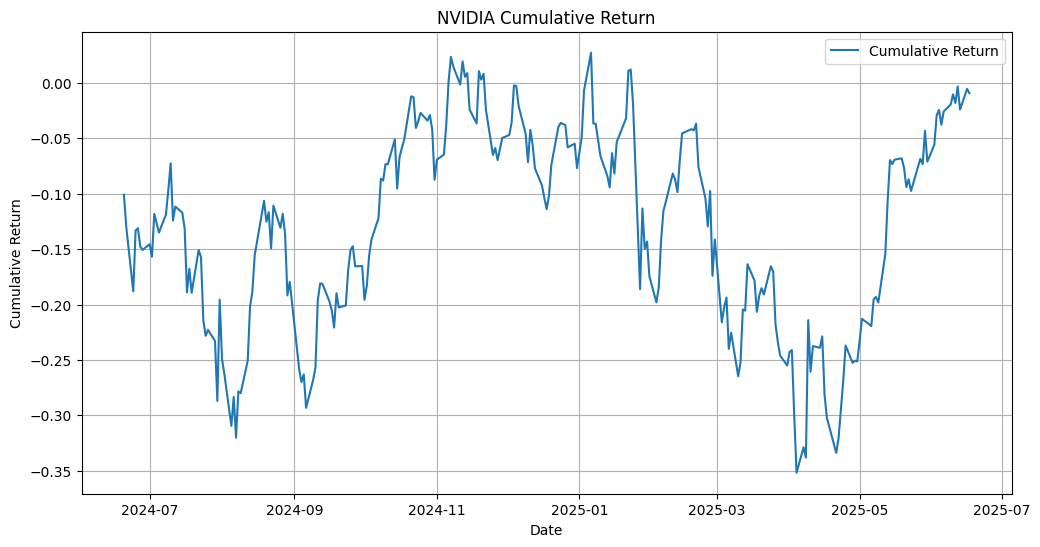

In [42]:
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod() - 1
plt.figure(figsize=(12,6))
plt.plot(df['Cumulative Return'], label='Cumulative Return')
plt.title('NVIDIA Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()